# Test 6.0

## Theory Question


Question 1: Explain InceptionNet with its modules.

Question 2: Explain Residual Networks (ResNet) and discuss why they are considered advantageous compared to other architectures.

## InceptionNet:
Inception Net is also known as GoogleNet, it is one of the Model architecture of Convolutional Neural Network(CNN).
* It considers to be better than alexnet and VGG architecture.
* In this architecture the layers will go deeper and wider,it contains naive version is aka module and dimension reduction version is a layers.
* The architecture consists of 9 Inception modules and 27 layers with 2 auxillary branches, which is used for calculating the loss done only on training. It takes image input size as 299x299x3.
* The difference between VGG and Alexnet with Inception Net is that, In AlexNet there will be 5x5 convolutional layers, small features cant be predicted, In VGG they reduced to two 3X3 for better prediction, still the distant small features are difficult to predict by the model, so In the Inception Net for identify very small features they come up with 1x1 convolutional layer. This will predict small features accurately.

For Version 2 and Version 3 they too released by same paper.

* Module 1- they removed 5x5 with two 3X3
* Module 2- They factorize 3X3 with 1x3 and 3x1
* Module 3- They will go deeper and wider with 1x3 and 3x1.




## ResNet( Residual Networks):

ResNet is known as Residual Network. This Architecture is considered to be one of the best compared to other architectures.

* From the VGG and InceptionNet, the layers will go deeper and wider, as it goes deeper the layers are increased the parameters also increases it will lead to Overfitting and Network Degradation problem.

* Network degradation problem is the problem of ***Vanishing Gradient*** and ***Gradient explosion***.

* **Vanishing Gradient**- when the weights assigned are too low, it takes too small steps to reach global minima, it consumes more time
* **Gradient Explosion**- When the assigning weights are too large, it will take bigger steps in order reach the global minima, since the steps are larger it will go beyond the global minima, which is it won't reach global minima.

*  Advantage of Resnet we can able solve the overfitting and Network degradation problem.

* This Architecture defines it will go through skip connection when the function f(x) is describe when the input image pass through the residual layers with activation function as relu and again residual layer the predicted output performs poor, it will skip the connection is taken as 'x' the output will be f(x)+x.

* There is inception resnet, here the stem structure is changed, change the name and add 2 reduction blocks A and B In A block which converts 35X35 into 14x14  and in B block converts 14x14 to 8x8 layers. Finally will go for the skip connection.



## Practicle Question

- Load the chess dataset
    

# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task:
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task:
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters only on each layer)
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task:
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task:
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task:
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

In [1]:
# Import Necessary Libraries
import tensorflow as tf
import os
import numpy as np

In [2]:
# Import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import the zipfile module
import zipfile

# Specify the path to the zip file
zip_file_path = "/content/drive/MyDrive/Scifor Technologies/Sports-celebrity images.zip"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  # Extract all the files in the zip file
  zip_ref.extractall("/content")

In [4]:
base_dir = r"/content/Sports-celebrity images/"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Image_size = 224
Batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [9]:

train_generator = train_datagen.flow_from_directory(
    base_dir,                    # Path to the target directory
    target_size=(Image_size, Image_size),  # Resize images to 224x224 pixels
    batch_size=Batch_size,       # Number of images per batch
    subset='training'            # Use subset 'training' from the directory
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,                    # Path to the target directory
    target_size=(Image_size, Image_size),  # Resize images to 224x224 pixels
    batch_size=Batch_size,       # Number of images per batch
    subset='validation'          # Use subset 'validation' from the directory
)


Found 399 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [10]:
from glob import glob  # Importing glob module to handle file path expansion

# Glob all folders in the specified directory
folders = glob(r"/content/Sports-celebrity images/*")

# Print the number of folders found
print(len(folders))


4


In [11]:
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

from keras import utils

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, each of size 3x3,
# ReLU activation, He uniform kernel initializer, and input shape of (224, 224, 3)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(224, 224, 3)))

# Add a max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D arrays into a 1D array for the fully connected layers
model.add(Flatten())

# Add a fully connected layer with 100 neurons, ReLU activation,
# He uniform kernel initializer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

# softmax activation function for multi-class classification
model.add(Dense(4, activation='softmax'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 100)               39427300  
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 39428600 (150.41 MB)
Trainable params: 39428600 (150.41 MB)
Non-trainable params: 0 (0.00 Byte)
____________

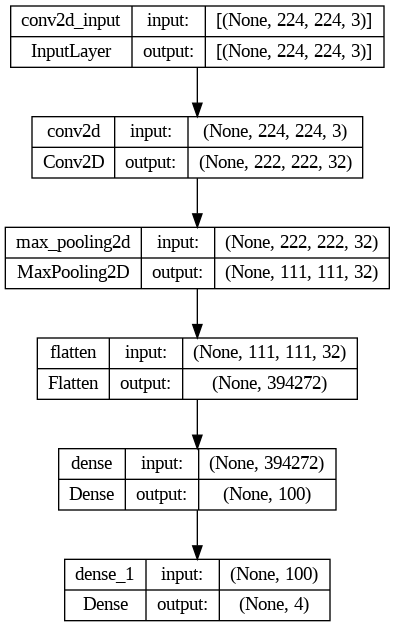

In [14]:
utils.plot_model(model, show_shapes=True)


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:
epoch = 10  # Number of training epochs

history = model.fit(train_generator,            # Training data generator
                    steps_per_epoch=len(train_generator),  # Number of steps (batches) per epoch
                    epochs=epoch,             # Number of epochs to train the model
                    validation_data=validation_generator,  # Validation data generator
                    validation_steps=len(validation_generator)  # Number of validation steps per epoch
                   )

Epoch 1/10
13/13 [==============================] - 31s 2s/step - loss: 2.0824 - accuracy: 0.6591 - val_loss: 4.5585 - val_accuracy: 0.5952
Epoch 2/10
13/13 [==============================] - 31s 2s/step - loss: 2.5701 - accuracy: 0.6115 - val_loss: 5.0122 - val_accuracy: 0.5000
Epoch 3/10
13/13 [==============================] - 30s 2s/step - loss: 2.5133 - accuracy: 0.6341 - val_loss: 3.5079 - val_accuracy: 0.6667
Epoch 4/10
13/13 [==============================] - 31s 2s/step - loss: 2.8507 - accuracy: 0.6140 - val_loss: 2.9939 - val_accuracy: 0.5952
Epoch 5/10
13/13 [==============================] - 36s 3s/step - loss: 1.2616 - accuracy: 0.7168 - val_loss: 4.2253 - val_accuracy: 0.5476
Epoch 6/10
13/13 [==============================] - 31s 2s/step - loss: 0.9003 - accuracy: 0.7669 - val_loss: 2.0754 - val_accuracy: 0.5714
Epoch 7/10
13/13 [==============================] - 31s 2s/step - loss: 0.7163 - accuracy: 0.7945 - val_loss: 3.5348 - val_accuracy: 0.5476
Epoch 8/10
13/13 [==

In [20]:
model.evaluate(validation_generator)

2/2 [==============================] - 1s 149ms/step - loss: 2.1503 - accuracy: 0.5714


[2.1502525806427, 0.5714285969734192]

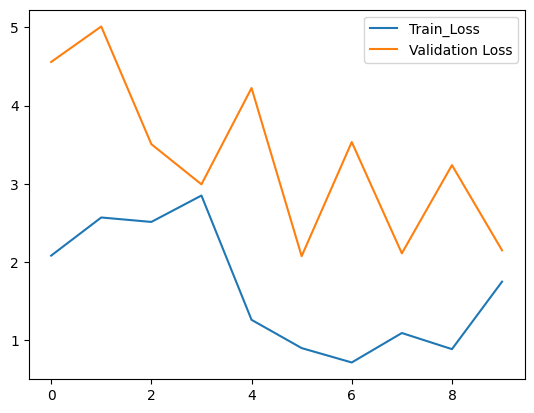

In [23]:
plt.plot(history.history['loss'],label='Train_Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

In [24]:
model.save('sports_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import keras
model=keras.models.load_model('sports_cnn_model.h5')

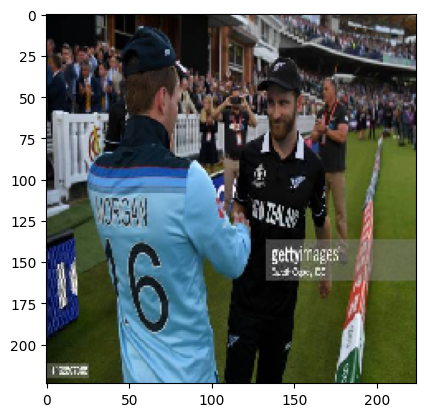

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img, img_to_array


# load the image
img = load_img(r"/content/Sports-celebrity images/Kane Williamson/kane_(100).jpg", target_size=(224,224))

# convert to array
img = img_to_array(img)

# center pixel data
img = img / 255.0

# show the image
plt.imshow(np.uint8(img*255))
plt.show()

In [40]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image
import numpy as np

img_pred=image.load_img(r"/content/Sports-celebrity images/Kane Williamson/kane_(100).jpg",target_size=(224,224))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="kobe"


else:
    prediction="kane"
print(prediction)


1/1 [==============================] - 0s 59ms/step
[[0. 0. 0. 1.]]
kane


In [ ]:
#AI/ML Trainer - Saurav
#Date 14 June 2024
#Time - 12:20